In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
SAMPLE_SIZE = 1_000_000

_**Proposition:**_ Let $U$ ba a $U[0,1]$ random variable. For any continuous distribution function $F$
the random variable $X$ defined by $$X=F^{-1}(U)$$ has distribution $F$. [$F^{-1}$ is defined to be that value of $x$ such that $F(x)=u$]

# Exponential distribution

$x\sim exp(\lambda)$

i.e. $f(x,\lambda) = \lambda e^{-\lambda x}$ for $X\ge 0$ and $0$ otherwise

Let $\lambda = 2$

In [3]:
Lambda = 2


def Exp_dis(x, lam=Lambda):
    return lam * np.exp(-lam * x)

Now, $F(x, \lambda) = 1-e^{-\lambda x}$

In [4]:
def CDF_Exp(x, lam):
    return 1 - np.exp(-lam * x)

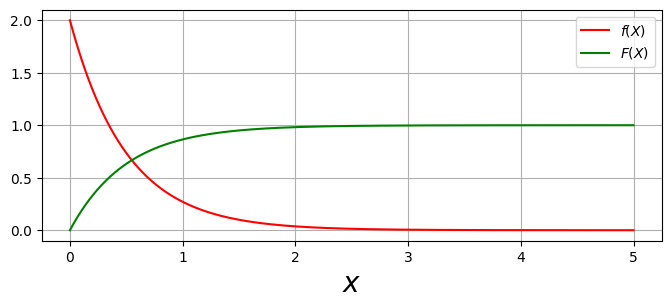

In [5]:
x = np.linspace(0, 5, 10000)
plt.figure(figsize=(8, 3))
plt.plot(x, Exp_dis(x, Lambda), "red", label="$f(X)$")
plt.plot(x, CDF_Exp(x, Lambda), "green", label="$F(X)$")
plt.xlabel("$x$", fontsize=20)
plt.legend()
plt.grid()
plt.show()

now, $F^{-1}(y) = - \frac{\ln(1-y)}{\lambda}$
if $y \sim U(0,1)$ then also, $1-y \sim U(0,1)$.

Then $F^{-1}(y) = - \frac{\ln(y)}{\lambda}$ will also work for easy simulation.

In [6]:
def INV_CDF_Exp(y, lam):
    return -np.divide(np.log(y), lam)

In [7]:
np.random.seed(1)

uniform_random_variables = np.random.uniform(size=SAMPLE_SIZE)

exponential_random_variables = INV_CDF_Exp(uniform_random_variables, Lambda)

In [8]:
exponential_expectation = np.mean(exponential_random_variables)
exponential_expectation

0.4997762640359414

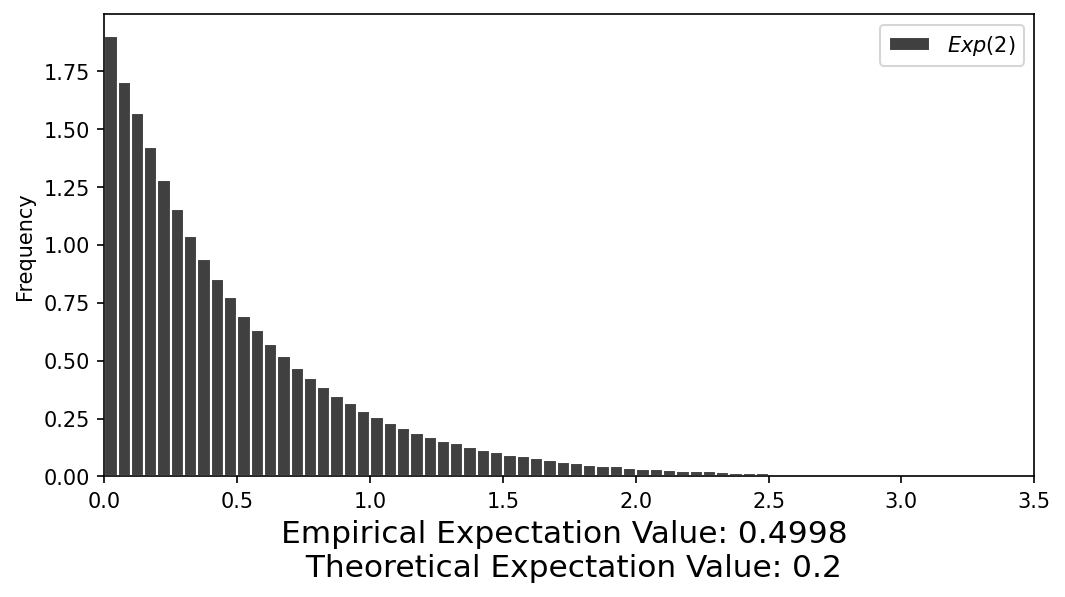

In [18]:
plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(
    exponential_random_variables,
    stat="density",
    linewidth=1,
    bins=150,
    color="black",
    edgecolor="white",
    label=r"$Exp(2)$",
)
# plt.axvline(exponential_expectation, color="r", linewidth=2, label="sample mean")
plt.xlabel(
    f"Empirical Expectation Value: {exponential_expectation:.4f} \n Theoretical Expectation Value: {1/Lambda}",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.xlim([0, 3.5])
plt.legend()
plt.show()

# Gamma distribution

$Y\sim G(n,\lambda)$

To generate $Y$, first we generate $x_i \sim exp(\lambda)$ then $Y=\sum_1^n x_i\sim G(n, \lambda)$

we take $\lambda = 5$ and $n=10$

In [19]:
Lambda = 5
N = 10

In [20]:
def ExponentialToGamma(n, Lambda=Lambda):
    gamma_random_variables = np.zeros(shape=SAMPLE_SIZE, dtype=float)
    for _ in range(n):
        uniform_random_variables = np.random.uniform(size=SAMPLE_SIZE)
        exponential_random_variables = np.divide(
            -np.log(uniform_random_variables), Lambda
        )  # convert uniform to exponential
        gamma_random_variables = np.add(
            gamma_random_variables, exponential_random_variables
        )
    return gamma_random_variables

In [21]:
np.random.seed(1)

gamma_random_variables = ExponentialToGamma(n=N, Lambda=Lambda)

In [22]:
gamma_expectation = np.mean(gamma_random_variables)
gamma_expectation

2.0001731616693927

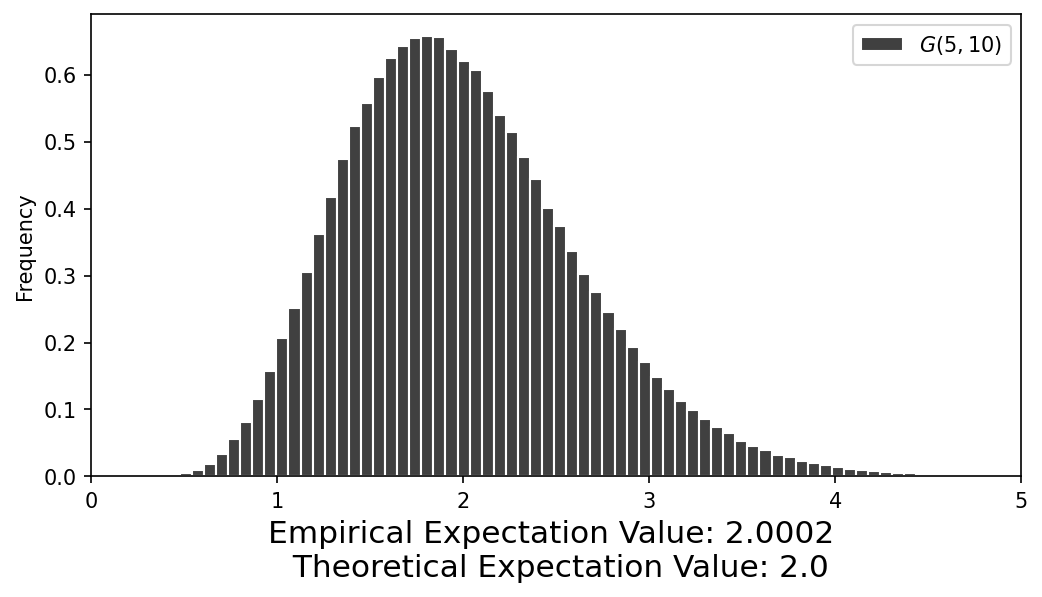

In [23]:
plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(
    gamma_random_variables,
    color="black",
    edgecolor="white",
    stat="density",
    linewidth=1,
    bins=100,
    label=r"$G(5,10)$",
)
# plt.axvline(gamma_expectation, color="r", linewidth=2, label="sample mean")
plt.xlabel(
    f"Empirical Expectation Value: {gamma_expectation:.4f} \n Theoretical Expectation Value: {N/Lambda}",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.xlim([0, 5])
plt.legend()
plt.show()

# Standard Normal Distribution

if $X\sim N(0,1)$
Then,
$$f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$$

## Accept–Reject Method

Taking *envelope density* $g(x)$ as standred exponential distribution then $c= \sqrt{\frac{2e}{\pi}}$

In [30]:
number_of_accptance = 0

standard_normal_random_variables = []

np.random.seed(1)
for _ in range(SAMPLE_SIZE):
    uniform1 = np.random.uniform()
    uniform2 = np.random.uniform()
    y1 = -np.log(uniform1)
    y2 = -np.log(uniform2)
    if y2 >= ((y1 - 1) ** 2) / 2:
        number_of_accptance += 1
        if np.random.uniform() <= 0.5:
            standard_normal_random_variables.append(y1)
        else:
            standard_normal_random_variables.append(-y1)

In [31]:
standard_normal_expectation = np.mean(standard_normal_random_variables)
print(f"Mean: {standard_normal_expectation}")

Mean: 0.0009145374385731805


In [32]:
accptance_rate = number_of_accptance / SAMPLE_SIZE
print(f"Accptance Rate: {accptance_rate}")

Accptance Rate: 0.76027


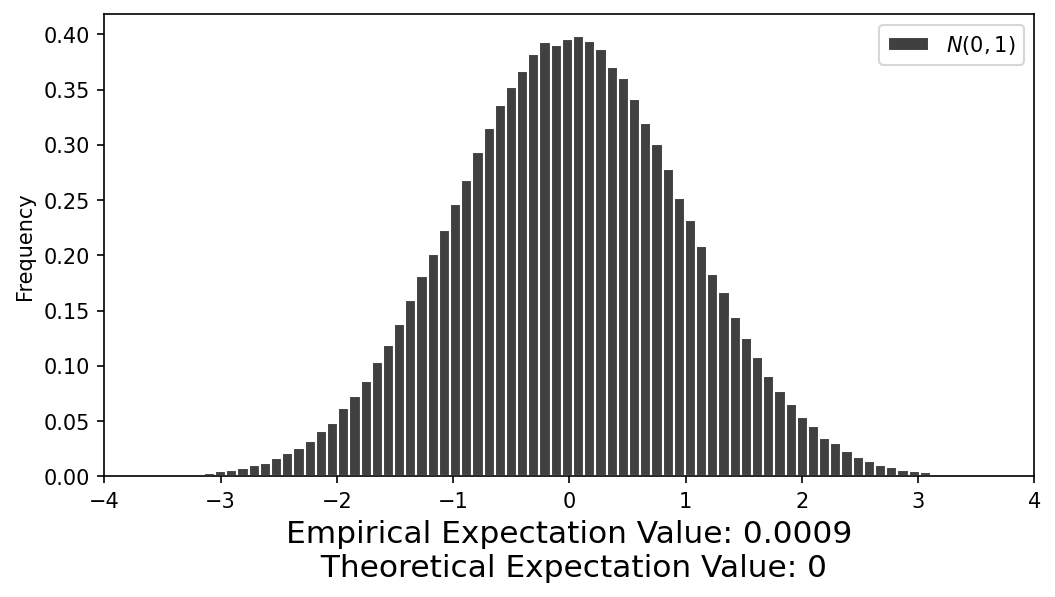

In [35]:
plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(
    standard_normal_random_variables,
    linewidth=1,
    stat="density",
    color="black",
    edgecolor="white",
    bins=100,
    label=r"$N(0,1)$",
)
plt.xlabel(
    f"Empirical Expectation Value: {standard_normal_expectation:.4f}\n Theoretical Expectation Value: 0",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.xlim([-4, 4])
plt.legend()
plt.show()

## The polar Method for Generating Normal Random Variable.

STEP 1: Generate random number $ U_1, U_2 \sim U(0,1) $.

STEP 2: $ R^{2} = - 2 \ln U_1 $ and $\Theta = 2 \pi U_2 $.

STEP 3: Now let,
$$
    X = R \cos \Theta = \sqrt{-2\ln U_1}\cos(2 \pi U_2) \\
    Y = R \sin \Theta = \sqrt{-2 \ln U_1} \sin(2 \pi U_2).
$$


In [43]:
np.random.seed(1)

uniform1 = np.random.uniform(size=SAMPLE_SIZE)
uniform2 = np.random.uniform(size=SAMPLE_SIZE)

R_squre = np.multiply(2, -np.log(uniform1))  # exp(1/2)
Theta = np.multiply(2, np.multiply(np.pi, uniform2))  # u(0,2pi)

X = np.multiply(np.sqrt(R_squre), np.cos(Theta))
Y = np.multiply(np.sqrt(R_squre), np.sin(Theta))

In [44]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

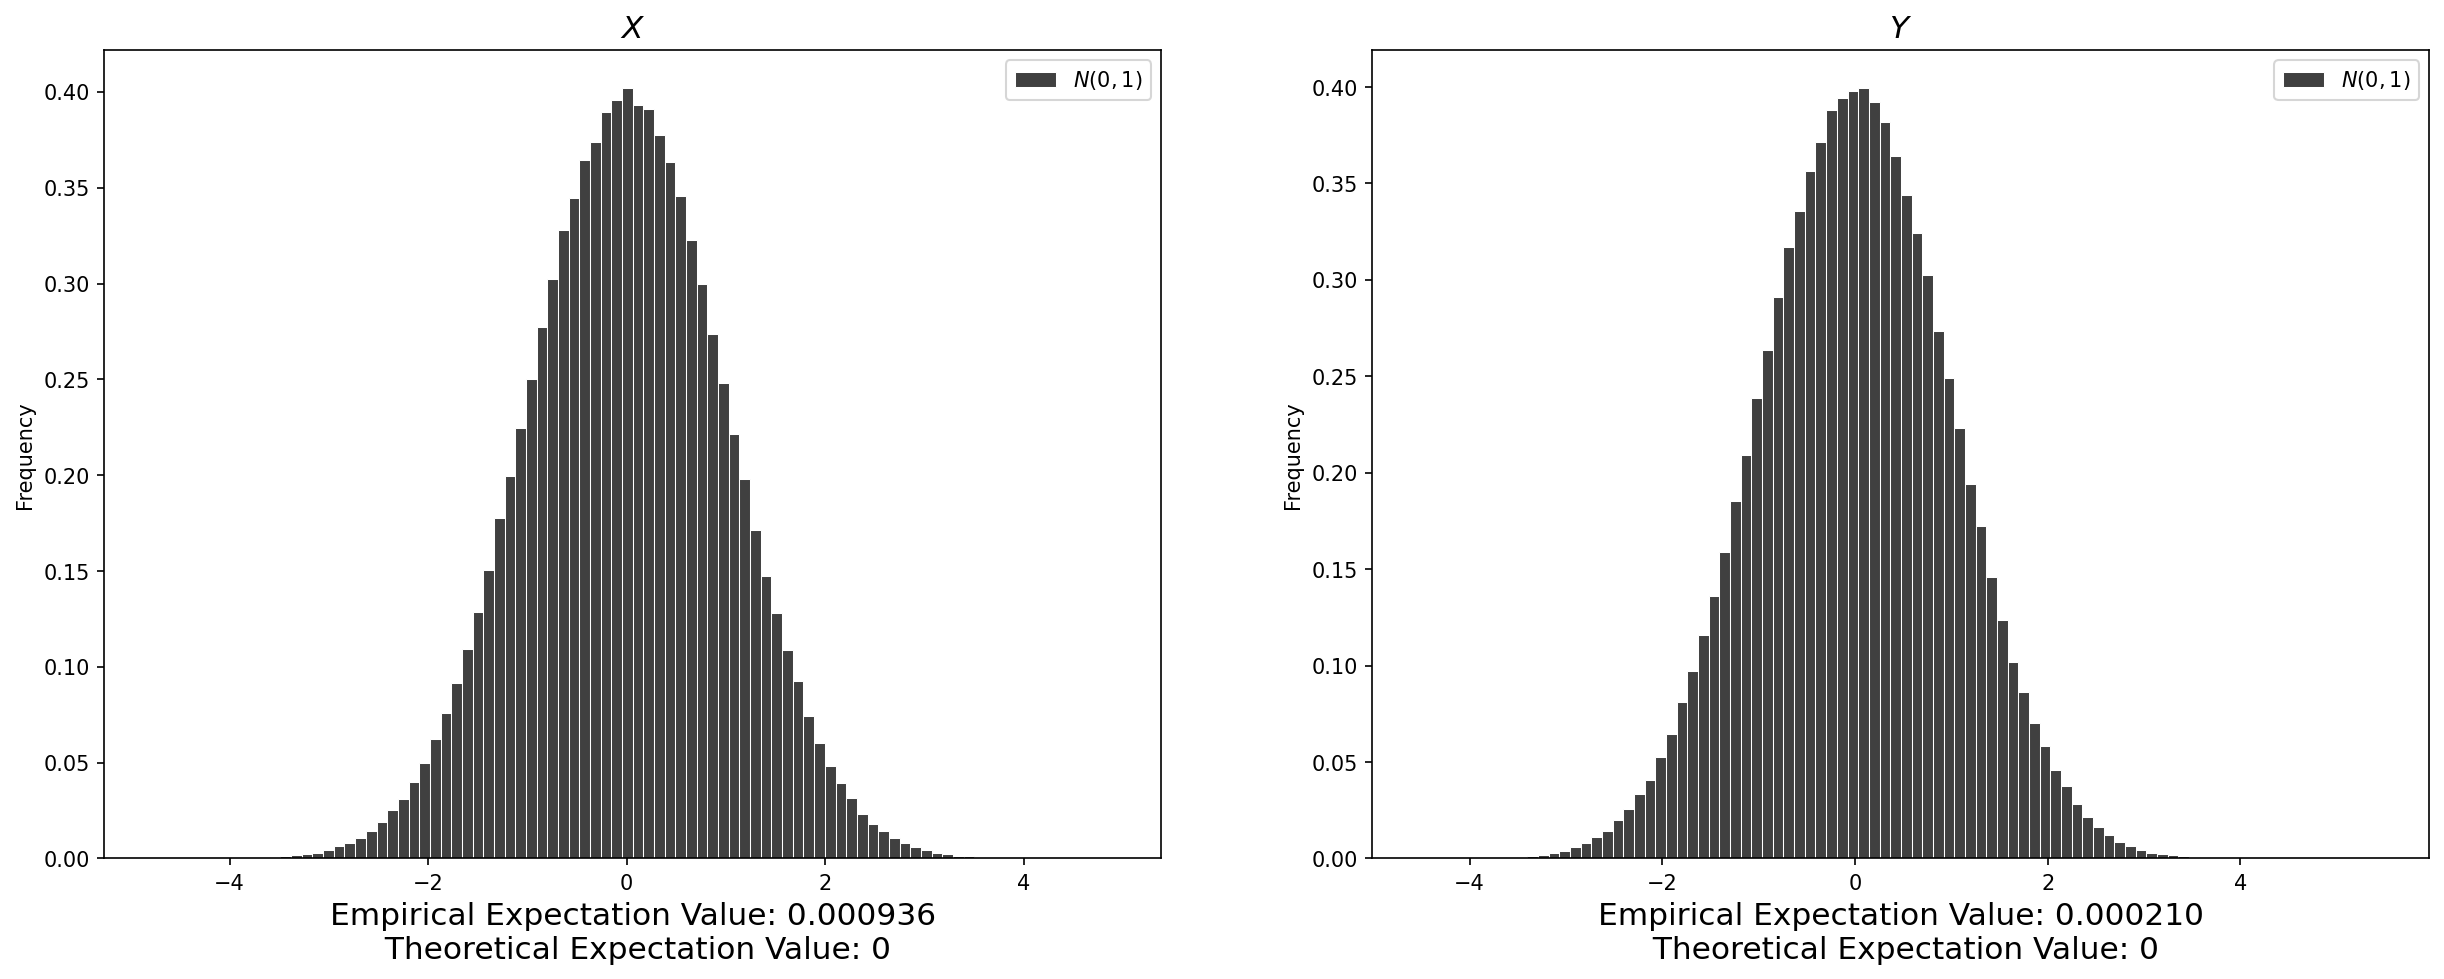

In [45]:
plt.figure(figsize=(20, 7), dpi=150)
plt.subplot(1, 2, 1)
sns.histplot(
    X,
    linewidth=0.5,
    stat="density",
    color="black",
    edgecolor="white",
    bins=90,
    label=r"$N(0,1)$",
)
# plt.axvline(X_mean, color="r", linewidth=2, label="sample mean")
plt.title("$X$", fontsize=15)
plt.xlabel(
    f"Empirical Expectation Value: {X_mean:4f}\n Theoretical Expectation Value: 0",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(
    Y,
    linewidth=0.5,
    stat="density",
    color="black",
    edgecolor="white",
    bins=90,
    label=r"$N(0,1)$",
)
# plt.axvline(Y_mean, color="r", linewidth=2, label="sample mean")
plt.title("$Y$", fontsize=15)
plt.xlabel(
    f"Empirical Expectation Value: {Y_mean:4f}\n Theoretical Expectation Value: 0",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Beta Distribution

By Accept–Reject method taking $g(x)=1$ and $c=\sup_x f(x)$

In [42]:
def Beta_RV(alpha, beta, Number_Of_Simulation):
    Beta_RVs = []
    number_of_accptance = 0
    for _ in range(Number_Of_Simulation):
        u = np.random.uniform()
        x = np.random.uniform()
        if u <= (
            x ** (alpha - 1)
            * (1 - x) ** (beta - 1)
            * (alpha + beta - 2) ** (alpha + beta - 2)
        ) / ((alpha - 1) ** (alpha - 1) * (beta - 1) ** (beta - 1)):
            number_of_accptance += 1
            Beta_RVs.append(x)
    return Beta_RVs, number_of_accptance

In [46]:
alpha = 5
beta = 2

np.random.seed(1)
beta_random_variables, number_of_accptance = Beta_RV(
    alpha, beta, Number_Of_Simulation=SAMPLE_SIZE
)

In [47]:
beta_expectation = np.mean(beta_random_variables)
print(f"Mean: {beta_expectation}")

Mean: 0.7141057794046052


In [25]:
accptance_rate = number_of_accptance / SAMPLE_SIZE
print(f"Accptance Rate: {accptance_rate}")

Accptance Rate: 0.407063


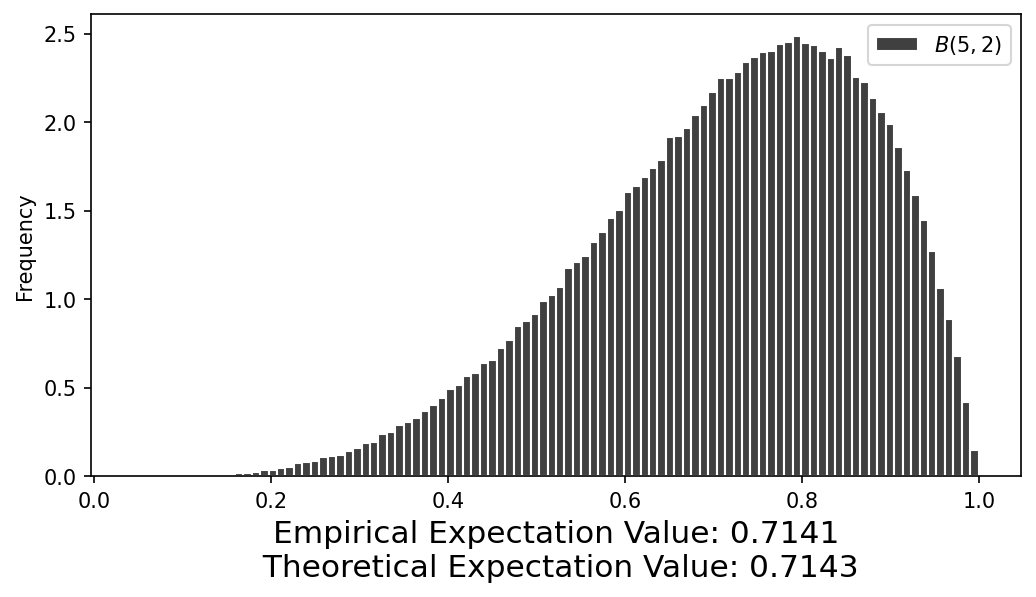

In [49]:
plt.figure(figsize=(8, 4), dpi=150)
sns.histplot(
    beta_random_variables,
    linewidth=1,
    stat="density",
    color="black",
    edgecolor="white",
    bins=100,
    label=r"$B(5,2)$",
)
# plt.axvline(beta_expectation, color="r", linewidth=2, label="sample mean")
plt.xlabel(
    f"Empirical Expectation Value: {beta_expectation:.4f}\n Theoretical Expectation Value: {alpha/(alpha+beta):.4f}",
    fontsize=15,
)
plt.ylabel("Frequency")
plt.legend()
plt.show()